# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [21]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [22]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [23]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

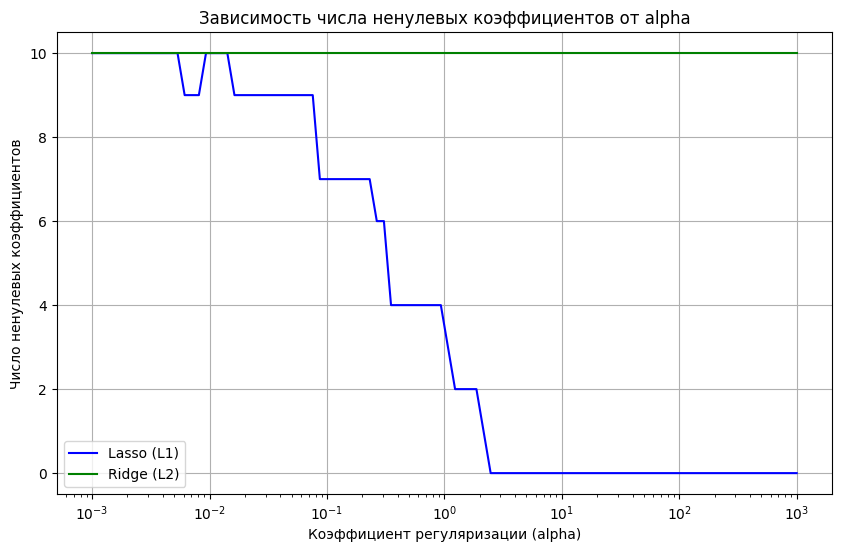

In [24]:
# Порог для определения близости коэффициента к нулю
threshold = 1e-3

# Логарифмическая сетка значений alpha
alphas = np.logspace(-3, 3, 100)

# Списки для хранения количества ненулевых коэффициентов
lasso_nonzero = []
ridge_nonzero = []

# Перебор значений alpha и подсчёт количества коэффициентов, не близких к нулю
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > threshold))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > threshold))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_nonzero, label='Lasso (L1)', color='blue')
plt.plot(alphas, ridge_nonzero, label='Ridge (L2)', color='green')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Число ненулевых коэффициентов')
plt.title('Зависимость числа ненулевых коэффициентов от alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [25]:
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
# code here
ridge_default = Ridge()
ridge_default.fit(X_train, y_train)
y_pred = ridge_default.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")


Ridge Regression Metrics:
RMSE: 58.3043
MAE: 49.6028
R^2: 0.3599


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?


Best alpha for RMSE: 0.08697
Best alpha for MAE: 0.02154
Best alpha for R^2: 0.08697


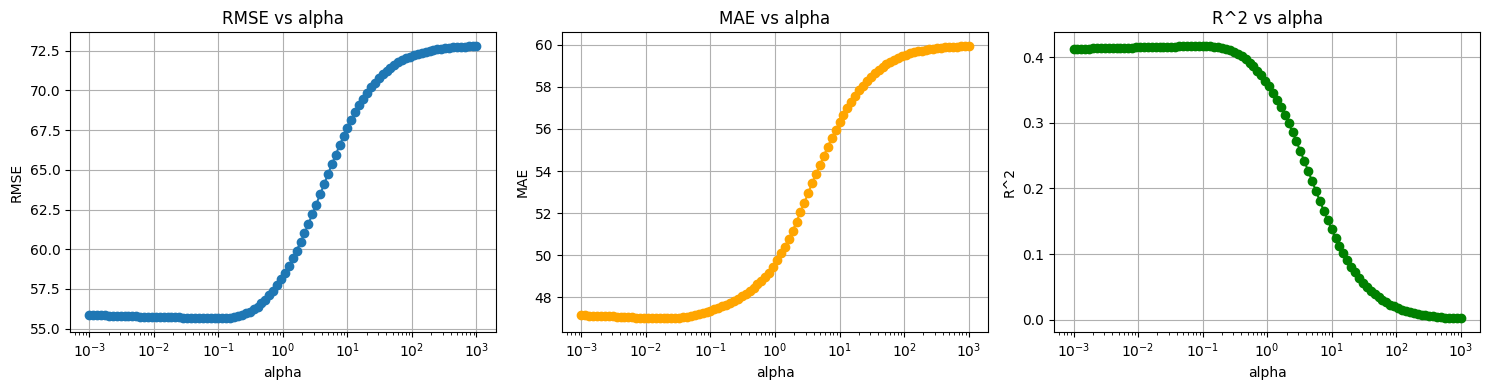


Ridge Regression (best alpha by RMSE) Metrics:
RMSE: 55.6391
MAE: 47.3174
R^2: 0.4171


In [27]:
# code here
rmse_list = []
mae_list = []
r2_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

# Нахождение лучших alpha
best_alpha_rmse = alphas[np.argmin(rmse_list)]
best_alpha_mae = alphas[np.argmin(mae_list)]
best_alpha_r2 = alphas[np.argmax(r2_list)]

print(f"\nBest alpha for RMSE: {best_alpha_rmse:.5f}")
print(f"Best alpha for MAE: {best_alpha_mae:.5f}")
print(f"Best alpha for R^2: {best_alpha_r2:.5f}")

# Построение графиков зависимости метрик от alpha
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(alphas, rmse_list, marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, mae_list, marker='o', color='orange')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAE vs alpha')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, r2_list, marker='o', color='green')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 vs alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

# Финальная модель с лучшим alpha по RMSE
ridge_best = Ridge(alpha=best_alpha_rmse)
ridge_best.fit(X_train, y_train)
y_pred_best = ridge_best.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nRidge Regression (best alpha by RMSE) Metrics:")
print(f"RMSE: {rmse_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"R^2: {r2_best:.4f}")

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?


Ridge Regression (best alpha by RMSE) Metrics:
RMSE: 55.6391
MAE: 47.3174
R^2: 0.4171


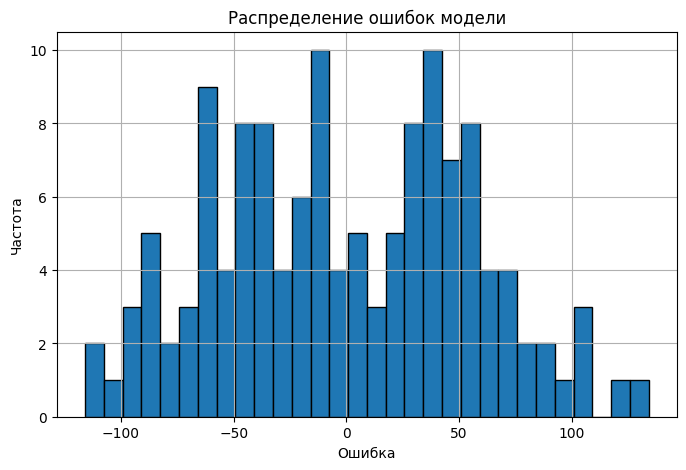

In [28]:
# code here
ridge_best = Ridge(alpha=best_alpha_rmse)
ridge_best.fit(X_train, y_train)
y_pred_best = ridge_best.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nRidge Regression (best alpha by RMSE) Metrics:")
print(f"RMSE: {rmse_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"R^2: {r2_best:.4f}")

# Анализ ошибок
errors = y_test - y_pred_best

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели')
plt.grid(True)
plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?


Ridge Regression (best alpha by RMSE) Metrics после удаления выбросов:
RMSE: 55.6391
MAE: 47.3174
R^2: 0.4171


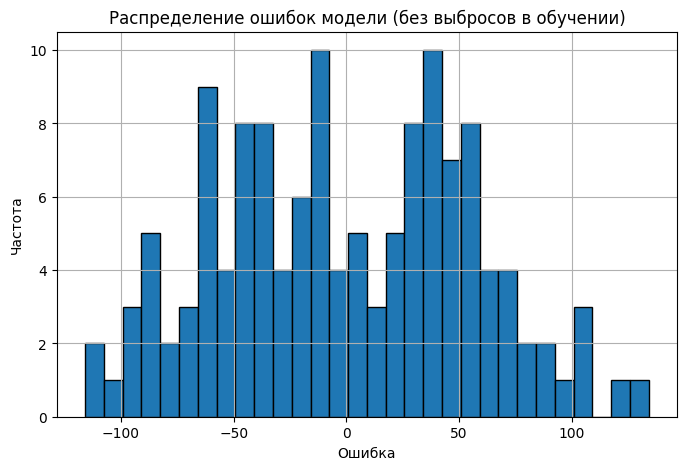

In [29]:
# code here
q1 = np.percentile(y_train, 25)
q3 = np.percentile(y_train, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# Финальная модель с лучшим alpha по RMSE на очищенных данных
ridge_best = Ridge(alpha=best_alpha_rmse)
ridge_best.fit(X_train_filtered, y_train_filtered)
y_pred_best = ridge_best.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"\nRidge Regression (best alpha by RMSE) Metrics после удаления выбросов:")
print(f"RMSE: {rmse_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"R^2: {r2_best:.4f}")

# Анализ ошибок
errors = y_test - y_pred_best

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели (без выбросов в обучении)')
plt.grid(True)
plt.show()

__Задание 3.__ Отчёт

**(2 балла)**

In [30]:
# code here